### Explaining the Maths involved in PCA through code

In [1]:
import numpy as np
# Creating an Array
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n = A.shape # m-observations, n-features

print("Array:")
print(A) # our array

print("---")
print("Dimensions:")
print(A.shape) # shape

print("---")
print("Mean across Rows:")
print(np.mean(A,axis=0))

Array:
[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
---
Dimensions:
(6, 2)
---
Mean across Rows:
[0. 0.]


In [2]:
# Converting the array into a DataFrame ...
import pandas as pd
df = pd.DataFrame(A, columns = ['a0', 'a1'])
print(df)

   a0  a1
0   3   7
1  -4  -6
2   7   8
3   1  -1
4  -4  -1
5  -3  -7


### Covariance

_Variance_ is the measure of how a variable changes or varies and _co_ means together. Hence, _covariance_ is the measure of how two variables change together.
<img src="covariance.PNG" width="500">

If the covariance is high, it means that the variables are highly correlated and change in one results in a change in the other one too.
Generally, we avoid using highly correlated variables in building a machine learning model.

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# makes charts pretty
import seaborn as sns
sns.set(color_codes=True)

<ipython-input-5-8fb5af28a02f>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Dataset $A$')

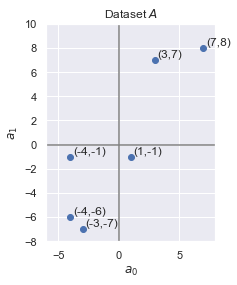

In [5]:
# plots
plt.scatter(A[:,0],A[:,1])   # create a scatter plot 

# annotations    
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Dataset $A$")

Sample covariance between $a_0$ and $a_1$:

$$
cov_{a_0,a_1} =\frac{\sum_{k=0}^{m-1}(a_0^k - \bar{a_0})(a_1^k - \bar{a_1})}{m-1}
$$

where $\bar{a_0}$ is the mean of column $a_0$ and $\bar{a_1}$ is the mean of column $a_1$

In [15]:
# Calculate covariance of a0 and a1
a0 = A[:,0]
a1 = A[:,1]
product = a0*a1 # element-wise product
print("Length of prod equals " + str(len(product)))
print("---")
print("Covariance:")
print(np.sum(product)/(m-1))

Length of prod equals 6
---
Covariance:
25.0


#### second way to calculate co varience

In [16]:
# Get more stuff using NumPy's covariance method
np.cov(a0,a1)   #a00 a01 a10 a11 are rawwise described inside following matrix

array([[20., 25.],
       [25., 40.]])

#### Third way to calculate co varience

The Linear Algebra way:
$$
\Sigma = \frac{A^TA}{(m-1)}
$$

In [18]:
# What is A.T?
A.T # This is the transpose of matrix A

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [19]:
# Matrix Multiplication, @ operator is used for calculating the dot product of two matrices
A.T @ A # or np.dot(A.T,A)

array([[100, 125],
       [125, 200]])

In [20]:
# As stated in the formula now we need to divide the  product by (m-1) to yield true Sample Covariance Matrix
# Let's call it Sigma
Sigma = (A.T @ A)/(m-1) # or np.cov(A.T)
Sigma

array([[20., 25.],
       [25., 40.]])

### Eigen-decomposition of $\Sigma$

According to [Wikipedia article on PCA](https://en.m.wikipedia.org/wiki/Principal_component_analysis), *"PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix or singular value decomposition of a data matrix."* The second approach has already been discussed above. Let's discuss the first approach now.

$\Sigma$ is a real, symmetric matrix; thus, it has 

1) real eigenvalues, and

2) orthogonal eigenvectors.

Definition:

An **eigenvector v** of a linear transformation **T** is a nonzero vector that, when **T** is applied to it, does not change direction. Applying __T__ to the eigenvector only scales the eigenvector by the scalar value λ, called an **eigenvalue**. This condition can be written as the equation

$$
{\displaystyle T(\mathbf {v} )=\lambda \mathbf {v} ,} 
$$

In [21]:
Sigma

array([[20., 25.],
       [25., 40.]])

In [22]:
# obtaining the eigenvalues and eigen vectors for the matrix Sigma
l, X = np.linalg.eig(Sigma)
print("Eigenvalues:")
print(l)
print("---")
print("Eigenvectors:")
print(X)

Eigenvalues:
[ 3.07417596 56.92582404]
---
Eigenvectors:
[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


Recall from your Linear Algebra class that the following should hold:

\begin{eqnarray}
\Sigma x_0 &=& \lambda_0 x_0 \nonumber \\
\Sigma x_1 &=& \lambda_1 x_1 \nonumber \\
\end{eqnarray}

In [24]:
# let's check the first Eigenvalue, Eigenvector combination
print("Sigma times eigenvector:")
print(Sigma @ X[:,0]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[0] * X[:,0]) # scalar times 2x1

#both above provide same result as sigma is covarience matrix and lambda l is eigen values

Sigma times eigenvector:
[-2.54562438  1.72347161]
Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [25]:
# ... and the product with the second eigenvalue
print("Sigma times eigenvector:")
print(Sigma @ X[:,1]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[1] * X[:,1]) # scalar times 2x1, ANNOYING - MUST USE * vs. @

Sigma times eigenvector:
[-31.91425695 -47.13840945]
Eigenvalue times eigenvector:
[-31.91425695 -47.13840945]


In [26]:
print("The first principal component is eigenvector with largest evalue:")
print(X[:,1])
print("---")
print("Second principal component:")
print(X[:,0])

The first principal component is eigenvector with largest evalue:
[-0.56062881 -0.82806723]
---
Second principal component:
[-0.82806723  0.56062881]


In [27]:
# Are the two Principal components Orthogonal? If the dot product of two matrices is zero, then they are considered to be orthogonal
X[:,1].T @ X[:,0]

0.0

<ipython-input-31-3dd569822020>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Eigenvectors of $\\Sigma$')

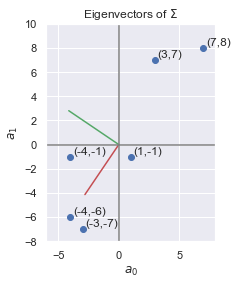

In [31]:
# plotting the Eigen Vectors
plt.scatter(A[:,0],A[:,1])
scale = 5 # increase this scaling factor to highlight these vectors
#where first is x1 x2 and second list is y1 y2 which draw line pass through x1,y1 and x2,y2
plt.plot([0,X[0,1]*scale],[0,X[1,1]*scale],'r') # First principal component
plt.plot([0,X[0,0]*scale],[0,X[1,0]*scale],'g') # Second principal component

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Eigenvectors of $\Sigma$")

## Dimensionality Reduction: 2D to 1D

In [33]:
# change to matrix
Amat = np.asmatrix(A)
Xmat = np.asmatrix(X)
Amat

matrix([[ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]])

In [34]:
Xmat

matrix([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]])

In [35]:
# Choose eigenvector with highest eigenvalue as first principal component
pc1 = Xmat[:,1]
pc1

matrix([[-0.56062881],
        [-0.82806723]])

In [36]:
Acomp = Amat @ pc1 # the dot product of a 6x2 and 2x1 matrix yields a 6x1 matrix
print("Compressed version of A:")
print(Acomp)

Compressed version of A:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [37]:
Arec = Acomp @ pc1.T # the dot product of a  6x1 matrix and 1x2 matrix results into a 6x2 matrix
print("Reconstruction from 1D compression of A:")
print(Arec)

Reconstruction from 1D compression of A:
[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


<ipython-input-45-833d3a395905>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Reconstructing the 1D compression of $A$')

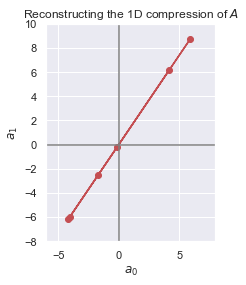

In [45]:
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED

# annotations
#for i in range(m):
    #plt.annotate('('+str(Arec[i,0])+','+str(Arec[i,1])+')',(Arec[i,0]+0.2,Arec[i,1]+0.2))
# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Reconstructing the 1D compression of $A$")

In [39]:
print(np.linalg.matrix_rank(Amat)) # originally a Rank 2 matrix
print(np.linalg.matrix_rank(Arec)) # reconstructed matrix is Rank 1

2
1


### Summary of Eigen-decomposition Approach
1. Normalize columns of $A$ so that each feature has a mean of zero
1. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
1. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
1. Compress by ordering $k$ evectors according to largest e-values and compute $AX_k$
1. Reconstruct from the compressed version by computing $A X_k X_k^T$


## Python Implementation


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
# we are using the free glass datset.
# The objective is to tell the type of glass based on amount of other elements present.
data = pd.read_csv('glass.data')

In [27]:
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
data.isna().sum()

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [29]:
label = data[["Class"]]
data=data.drop(labels=['index','Class'], axis=1)

In [30]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


We’ll go ahead and standardise this data as all the data is on a different scale.


<AxesSubplot:>

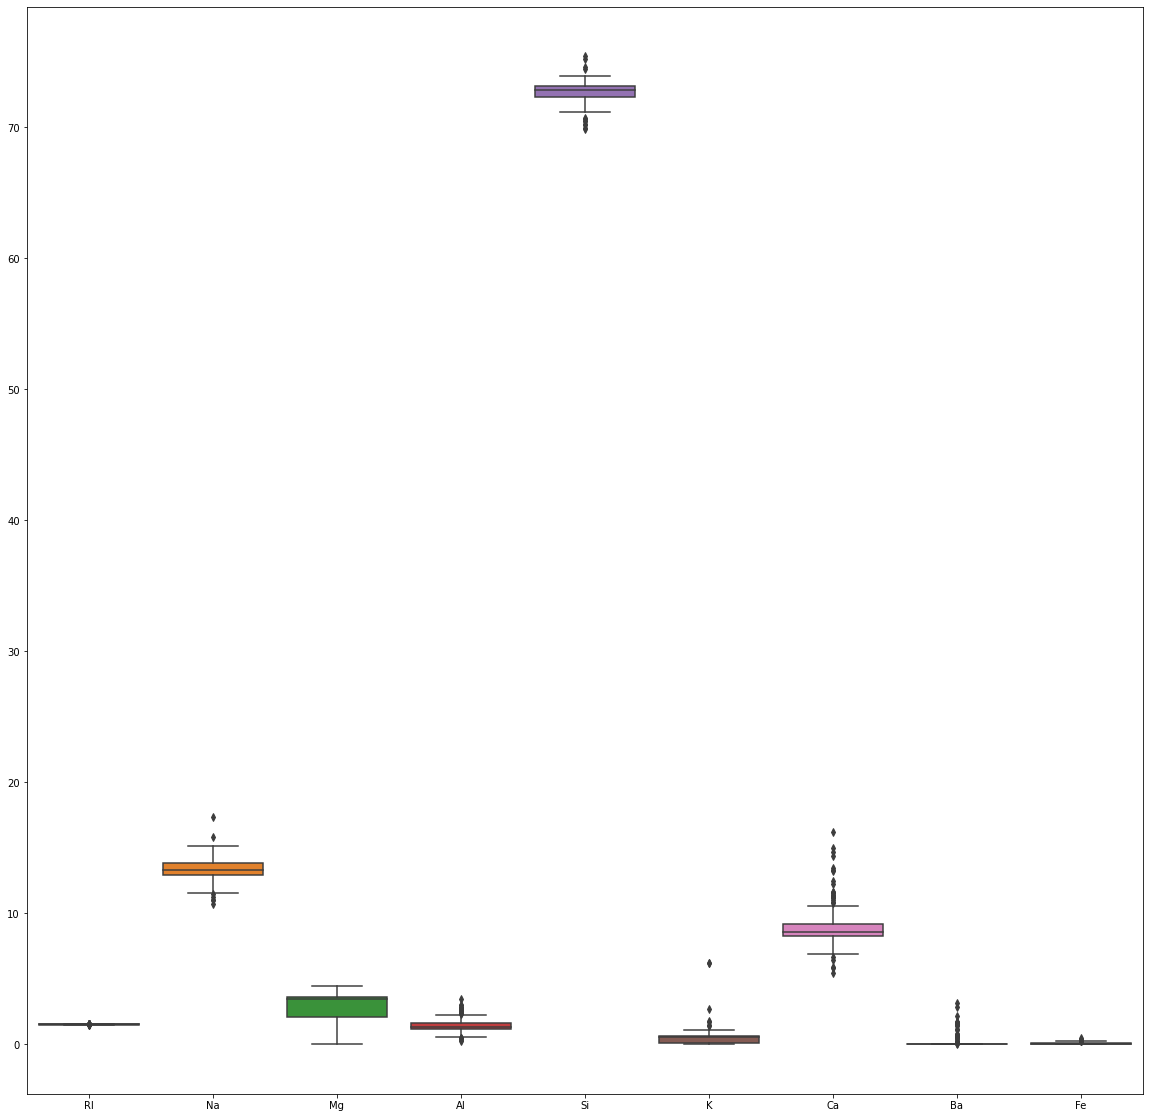

In [31]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = data , ax=ax)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)


In [33]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

In [34]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.737478e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


<AxesSubplot:>

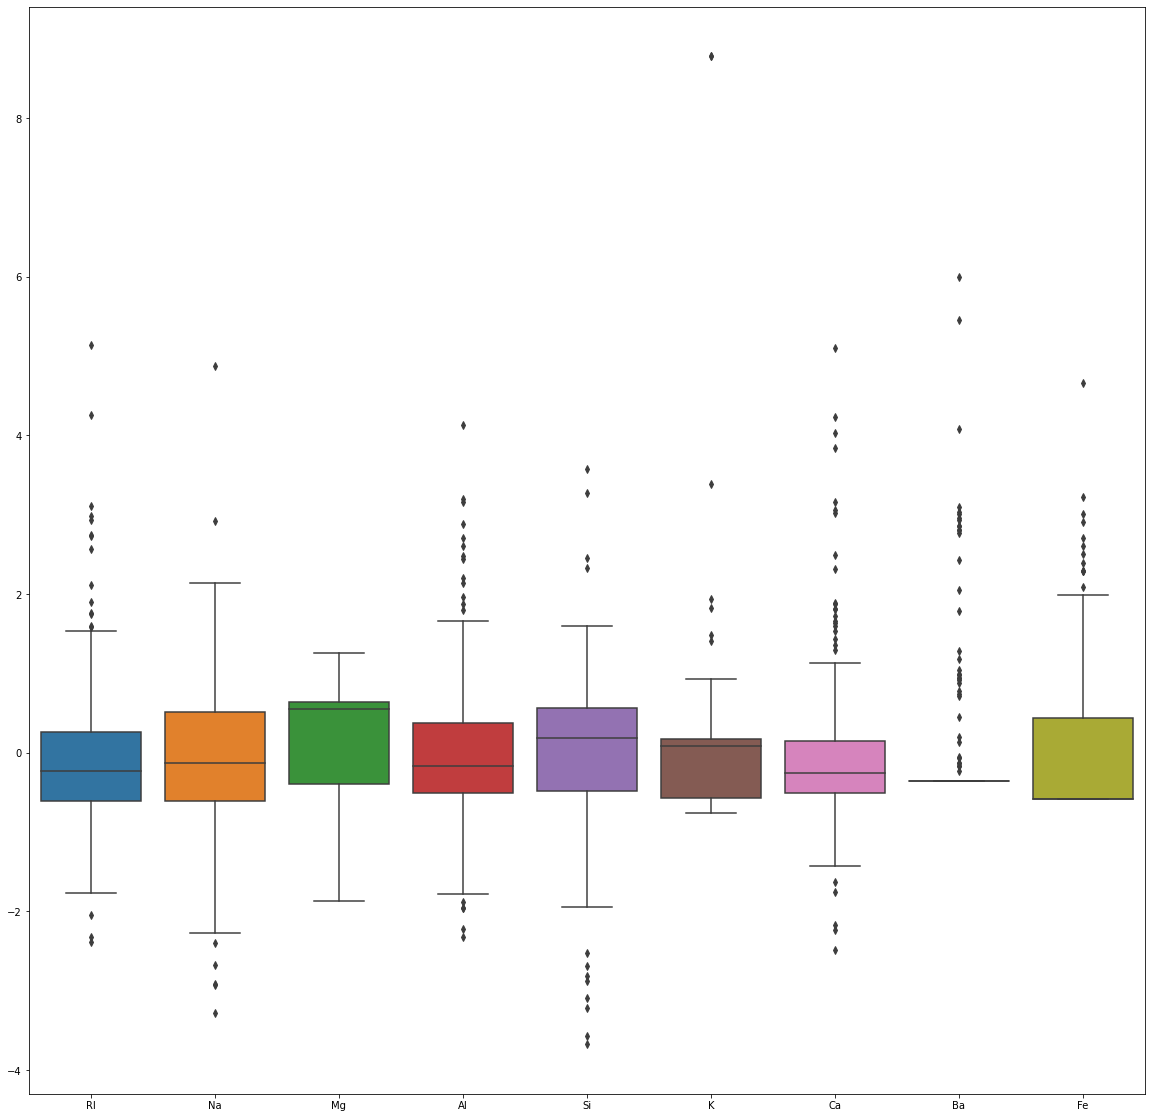

In [35]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax=ax)

#### Identify total number of PCA fit to data using screen plot

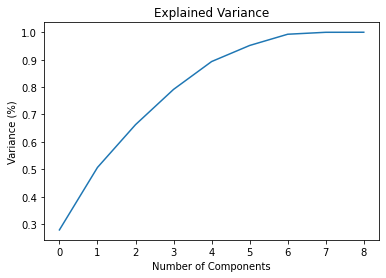

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))   #cumsum is cumulative sum where evr used to explain %of data representation by features
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.


In [38]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [39]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


In [49]:
principal_Df.describe()

,principal component 1,principal component 2,principal component 3,principal component 4
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,6.848105e-17,-1.162103e-16,-2.593979e-17,-5.706754e-18
std,1.588381e+00,1.435164e+00,1.188040e+00,1.078563e+00
min,-4.432540e+00,-1.816556e+00,-5.165069e+00,-3.777312e+00
25%,-6.575585e-01,-1.021452e+00,-4.473870e-01,-5.235952e-01
50%,-5.651885e-02,-6.591921e-01,-9.336385e-02,-3.727560e-02
75%,6.342901e-01,6.345286e-01,2.820617e-01,4.704891e-01
max,7.138698e+00,6.193445e+00,7.987193e+00,3.999072e+00


Here, we see that earlier we had 9 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 4. This is the advantage of PCA. _It drastically reduces the number of features, thereby considerably reducing the training time for the model._

In [47]:
fianl_data = pd.merge(principal_Df,label,how="left", left_index = True ,right_index=True)

In [56]:
fianl_data = fianl_data.set_axis(["PC1","PC2","PC3","PC4","Class"] , axis = 1)